In [1]:
%load_ext kedro.extras.extensions.ipython

The kedro.extras.extensions.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.extras.extensions.ipython


In [2]:
%reload_kedro

2022-07-25 19:03:56,704 - kedro.framework.hooks.manager - INFO - Registered hooks from 1 installed plugin(s): kedro-mlflow-0.8.1
2022-07-25 19:03:56,750 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-07-25 19:03:57,280 - root - INFO - ** Kedro project GetInData ML Framework
2022-07-25 19:03:57,281 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-07-25 19:03:57,290 - root - INFO - Registered line magic `run_viz`
2022-07-25 19:03:57,291 - root - INFO - Registered line magic `reload_kedro_mlflow`


In [3]:
catalog.list()

['articles',
 'customers',
 'transactions',
 'customers_sample',
 'transactions_sample',
 'articles_sample',
 'input_images',
 'resized_images',
 'image_embeddings',
 'text_embeddings',
 'parameters',
 'params:image_embeddings_inference',
 'params:image_embeddings_inference.run_id',
 'params:image_embeddings_inference.image_path',
 'params:image_embeddings_inference.batch_size',
 'params:customers',
 'params:transactions',
 'params:articles',
 'params:image_embeddings',
 'params:image_embeddings.image_path',
 'params:image_embeddings.encoder',
 'params:image_embeddings.decoder',
 'params:image_embeddings.batch_size',
 'params:image_embeddings.image_size',
 'params:image_embeddings.embedding_size',
 'params:image_embeddings.num_epochs',
 'params:image_embeddings.shuffle_reconstructions',
 'params:image_embeddings.save_model',
 'params:image_embeddings.model_name',
 'params:image_embeddings.seed',
 'params:image_resizer',
 'params:image_resizer.output_size',
 'params:image_resizer.method

In [4]:
context.catalog.load('params:image_resizer.output_size')

2022-07-25 19:03:57,317 - kedro.io.data_catalog - INFO - Loading data from `params:image_resizer.output_size` (MemoryDataSet)...


[128, 128]

In [5]:
context.catalog.load('params:image_resizer.method')

2022-07-25 19:03:57,335 - kedro.io.data_catalog - INFO - Loading data from `params:image_resizer.method` (MemoryDataSet)...


'lanczos'

In [6]:
context.catalog.load('input_images')

2022-07-25 19:03:57,509 - kedro.io.data_catalog - INFO - Loading data from `input_images` (DirWithImagesDataSet)...
_loads works
load_path=PosixPath('../data/01_raw/images/010')
<class 'pathlib.PosixPath'>
img_extension='jpg'
load_path.glob("*.jpg")=<generator object Path.glob at 0x1756fa430>
dir.cwd()=PosixPath('/Users/mmadej/Desktop/Projects/gid-ml-framework/notebooks')
images=['0108775051.jpg', '0108775044.jpg', '0108775015.jpg']
[img_name for img_name in load_path.glob("*")]=[PosixPath('../data/01_raw/images/010/0108775051.jpg'), PosixPath('../data/01_raw/images/010/0108775044.jpg'), PosixPath('../data/01_raw/images/010/0108775015.jpg')]
image_names=['0108775051.jpg', '0108775044.jpg', '0108775015.jpg']


{'0108775051': array([[[233, 233, 231],
         [233, 233, 231],
         [233, 233, 231],
         ...,
         [227, 227, 225],
         [227, 227, 225],
         [227, 227, 225]],
 
        [[232, 232, 230],
         [232, 232, 230],
         [232, 232, 230],
         ...,
         [226, 226, 224],
         [226, 226, 224],
         [226, 226, 224]],
 
        [[232, 232, 230],
         [232, 232, 230],
         [232, 232, 230],
         ...,
         [226, 226, 224],
         [226, 226, 224],
         [226, 226, 224]],
 
        ...,
 
        [[225, 224, 222],
         [226, 225, 223],
         [227, 226, 224],
         ...,
         [222, 222, 220],
         [222, 222, 220],
         [222, 222, 220]],
 
        [[225, 224, 222],
         [226, 225, 223],
         [227, 226, 224],
         ...,
         [222, 222, 220],
         [222, 222, 220],
         [222, 222, 220]],
 
        [[225, 224, 222],
         [226, 225, 223],
         [227, 226, 224],
         ...,
         [222,

In [7]:
from pathlib import Path

In [17]:
next(Path('../data/01_raw/images_128_128/').glob('*.jpg'))

PosixPath('../data/01_raw/images_128_128/0520567001.jpg')

In [7]:
context.catalog.load('resized_images')

2022-07-25 18:35:55,378 - kedro.io.data_catalog - INFO - Loading data from `resized_images` (DirWithImagesDataSet)...
_loads works
load_path=PosixPath('data/02_intermediate')
<class 'pathlib.PosixPath'>
img_extension='jpg'
images=[]
image_names=[]


{}

In [1]:
from gid_ml_framework.extras.datasets import DirWithImagesDataSet

### loading

In [2]:
my_dataset = DirWithImagesDataSet('../data/01_raw/images/010/')

In [3]:
my_data = my_dataset.load()

In [4]:
new_dict = dict()

In [5]:
for i, (key, value) in enumerate(my_data.items()):
    if i < 2:
        print(i)
        print(key)
        new_dict[key] = value

0
0108775051
1
0108775044


In [6]:
len(new_dict)

2

### saving

In [9]:
saving_dataset = DirWithImagesDataSet('../data/02_intermediate/')

In [10]:
saving_dataset._save(data=new_dict, folder_name='test_images', img_extension='jpg')

2022-07-25 15:24:18,740 - gid_ml_framework.extras.datasets - WARNING - Directory already exists


In [1]:
from PIL import Image

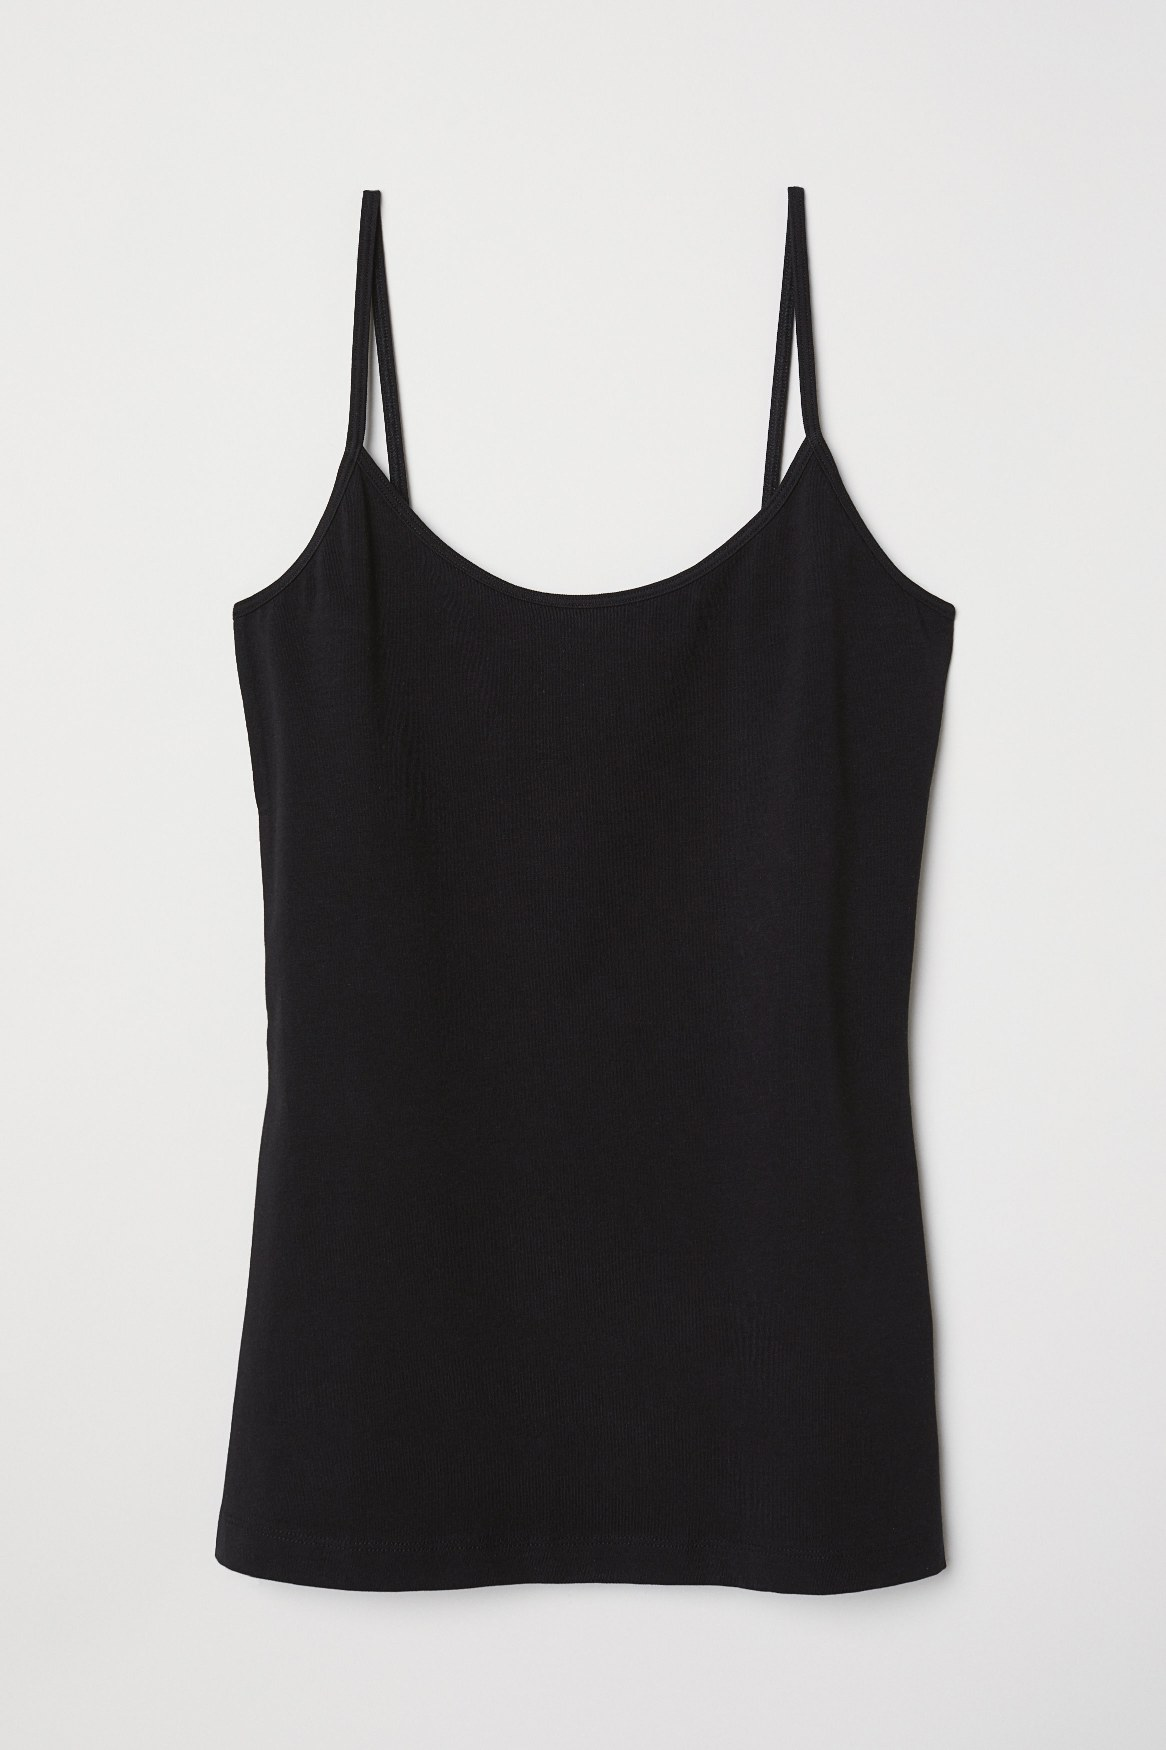

In [7]:
Image.open('../data/01_raw/images/010/0108775015.jpg').convert('RGB')

In [1]:
# https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial9/AE_CIFAR10.html#Building-the-autoencoder

In [3]:
catalog.list()

['articles',
 'customers',
 'transactions',
 'customers_sample',
 'transactions_sample',
 'parameters',
 'params:input',
 'params:input.image_path',
 'params:input.suffix',
 'params:cutoff_date',
 'params:sample_size']

In [4]:
my_dict = context.catalog.load('parameters')['input']

2022-07-12 11:33:04,024 - kedro.io.data_catalog - INFO - Loading data from `parameters` (MemoryDataSet)...


In [5]:
img_path, suffix = my_dict['image_path'], my_dict['suffix']

In [6]:
img_path, suffix

('/data/01_raw/images_128_128/', '.jpg')

In [8]:
import os
from torch import optim, nn, utils, Tensor
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset

In [9]:
import os
from pathlib import Path
from PIL import Image
from torchvision import transforms

In [10]:
class HMDataset(Dataset):
    
    def __init__(self, img_dir, transform=None):
        self.img_dir = Path(img_dir)
        self.img_names = self._get_img_names()
        self.transform = transform
        
    def _get_img_names(self):
        return [img_name.name for img_name in self.img_dir.iterdir()]

    def __getitem__(self, idx):
        img_path = self.img_dir / self.img_names[idx]
        img = Image.open(img_path)
        
        if self.transform is not None:
            img = self.transform(img)
        
        article_id = img_path.name
        return img, article_id

    def __len__(self):
        return len(self.img_names)

In [11]:
dataset = HMDataset('/Users/mmadej/Desktop/Projects/gid-ml-framework/data/01_raw/images_128_128/', transform=transforms.ToTensor())

In [12]:
dataset

In [13]:
dataloader = DataLoader(dataset=dataset,
                          batch_size=32,
                          drop_last=True,
                          shuffle=True,
                          num_workers=0)

In [14]:
class Encoder(nn.Module):

    def __init__(self,
                 num_input_channels : int,
                 base_channel_size : int,
                 latent_dim : int,
                 act_fn : object = nn.GELU):
        """
        Inputs:
            - num_input_channels : Number of input channels of the image. For CIFAR, this parameter is 3
            - base_channel_size : Number of channels we use in the first convolutional layers. Deeper layers might use a duplicate of it.
            - latent_dim : Dimensionality of latent representation z
            - act_fn : Activation function used throughout the encoder network
        """
        super().__init__()
        c_hid = base_channel_size
        self.net = nn.Sequential(
            nn.Conv2d(num_input_channels, c_hid, kernel_size=3, padding=1, stride=2), # 32x32 => 16x16
            act_fn(),
            nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
            act_fn(),
            nn.Conv2d(c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # 16x16 => 8x8
            act_fn(),
            nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
            act_fn(),
            nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # 8x8 => 4x4
            act_fn(),
            nn.Flatten(), # Image grid to single feature vector
            nn.Linear(2*16*c_hid, latent_dim)
        )

    def forward(self, x):
        return self.net(x)

In [15]:
class Decoder(nn.Module):

    def __init__(self,
                 num_input_channels : int,
                 base_channel_size : int,
                 latent_dim : int,
                 act_fn : object = nn.GELU):
        """
        Inputs:
            - num_input_channels : Number of channels of the image to reconstruct. For CIFAR, this parameter is 3
            - base_channel_size : Number of channels we use in the last convolutional layers. Early layers might use a duplicate of it.
            - latent_dim : Dimensionality of latent representation z
            - act_fn : Activation function used throughout the decoder network
        """
        super().__init__()
        c_hid = base_channel_size
        self.linear = nn.Sequential(
            nn.Linear(latent_dim, 2*16*c_hid),
            act_fn()
        )
        self.net = nn.Sequential(
            nn.ConvTranspose2d(2*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # 4x4 => 8x8
            act_fn(),
            nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
            act_fn(),
            nn.ConvTranspose2d(2*c_hid, c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # 8x8 => 16x16
            act_fn(),
            nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
            act_fn(),
            nn.ConvTranspose2d(c_hid, num_input_channels, kernel_size=3, output_padding=1, padding=1, stride=2), # 16x16 => 32x32
            nn.Tanh() # The input images is scaled between -1 and 1, hence the output has to be bounded as well
        )

    def forward(self, x):
        x = self.linear(x)
        x = x.reshape(x.shape[0], -1, 4, 4)
        x = self.net(x)
        return x

In [17]:
class LitAutoEncoder(pl.LightningModule):

    def __init__(self,
                 base_channel_size: int,
                 latent_dim: int,
                 encoder_class : object = Encoder,
                 decoder_class : object = Decoder,
                 num_input_channels: int = 3,
                 width: int = 32,
                 height: int = 32):
        super().__init__()
        # Saving hyperparameters of autoencoder
        self.save_hyperparameters()
        # Creating encoder and decoder
        self.encoder = encoder_class(num_input_channels, base_channel_size, latent_dim)
        self.decoder = decoder_class(num_input_channels, base_channel_size, latent_dim)
        # Example input array needed for visualizing the graph of the network
        self.example_input_array = torch.zeros(2, num_input_channels, width, height)

    def forward(self, x):
        """
        The forward function takes in an image and returns the reconstructed image
        """
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

    def _get_reconstruction_loss(self, batch):
        """
        Given a batch of images, this function returns the reconstruction loss (MSE in our case)
        """
        x, _ = batch # We do not need the labels
        x_hat = self.forward(x)
        loss = F.mse_loss(x, x_hat, reduction="none")
        loss = loss.sum(dim=[1,2,3]).mean(dim=[0])
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        # Using a scheduler is optional but can be helpful.
        # The scheduler reduces the LR if the validation performance hasn't improved for the last N epochs
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                         mode='min',
                                                         factor=0.2,
                                                         patience=20,
                                                         min_lr=5e-5)
        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}

    def training_step(self, batch, batch_idx):
        loss = self._get_reconstruction_loss(batch)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        loss = self._get_reconstruction_loss(batch)
        self.log('val_loss', loss)

    def test_step(self, batch, batch_idx):
        loss = self._get_reconstruction_loss(batch)
        self.log('test_loss', loss)

In [18]:
class GenerateCallback(pl.Callback):

    def __init__(self, input_imgs, every_n_epochs=1):
        super().__init__()
        self.input_imgs = input_imgs # Images to reconstruct during training
        self.every_n_epochs = every_n_epochs # Only save those images every N epochs (otherwise tensorboard gets quite large)

    def on_epoch_end(self, trainer, pl_module):
        if trainer.current_epoch % self.every_n_epochs == 0:
            # Reconstruct images
            input_imgs = self.input_imgs.to(pl_module.device)
            with torch.no_grad():
                pl_module.eval()
                reconst_imgs = pl_module(input_imgs)
                pl_module.train()
            # Plot and add to tensorboard
            imgs = torch.stack([input_imgs, reconst_imgs], dim=1).flatten(0,1)
            grid = torchvision.utils.make_grid(imgs, nrow=2, normalize=True, range=(-1,1))
            trainer.logger.experiment.add_image("Reconstructions", grid, global_step=trainer.global_step)

In [ ]:
def train_cifar(latent_dim):
    # Create a PyTorch Lightning trainer with the generation callback
    trainer = pl.Trainer(default_root_dir=os.path.join(CHECKPOINT_PATH, f"cifar10_{latent_dim}"),
                         gpus=1 if str(device).startswith("cuda") else 0,
                         max_epochs=500,
                         callbacks=[ModelCheckpoint(save_weights_only=True),
                                    GenerateCallback(get_train_images(8), every_n_epochs=10),
                                    LearningRateMonitor("epoch")])
    trainer.logger._log_graph = True         # If True, we plot the computation graph in tensorboard
    trainer.logger._default_hp_metric = None # Optional logging argument that we don't need

    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = os.path.join(CHECKPOINT_PATH, f"cifar10_{latent_dim}.ckpt")
    if os.path.isfile(pretrained_filename):
        print("Found pretrained model, loading...")
        model = Autoencoder.load_from_checkpoint(pretrained_filename)
    else:
        model = Autoencoder(base_channel_size=32, latent_dim=latent_dim)
        trainer.fit(model, train_loader, val_loader)
    # Test best model on validation and test set
    val_result = trainer.test(model, val_loader, verbose=False)
    test_result = trainer.test(model, test_loader, verbose=False)
    result = {"test": test_result, "val": val_result}
    return model, result

In [75]:
# define any number of nn.Modules (or use your current ones)
encoder = nn.Sequential(nn.Linear(128 * 128 * 3, 64), nn.ReLU(), nn.Linear(64, 3))
decoder = nn.Sequential(nn.Linear(3, 64), nn.ReLU(), nn.Linear(64, 128 * 128 * 3))

In [76]:
# define the LightningModule
class LitAutoEncoder(pl.LightningModule):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        x, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = nn.functional.mse_loss(x_hat, x)
        # Logging to TensorBoard by default
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [77]:
# init the autoencoder
autoencoder = LitAutoEncoder(encoder, decoder)

In [78]:
dataloader

In [79]:
# train the model (hint: here are some helpful Trainer arguments for rapid idea iteration)
trainer = pl.Trainer(limit_train_batches=100, max_epochs=1)

2022-07-12 09:32:03,947 - pytorch_lightning.utilities.rank_zero - INFO - GPU available: False, used: False
2022-07-12 09:32:03,952 - pytorch_lightning.utilities.rank_zero - INFO - TPU available: False, using: 0 TPU cores
2022-07-12 09:32:03,953 - pytorch_lightning.utilities.rank_zero - INFO - IPU available: False, using: 0 IPUs
2022-07-12 09:32:03,954 - pytorch_lightning.utilities.rank_zero - INFO - HPU available: False, using: 0 HPUs


In [80]:
trainer.fit(model=autoencoder, train_dataloaders=dataloader)

2022-07-12 09:32:04,779 - pytorch_lightning.loggers.tensorboard - WARNING - Missing logger folder: /Users/mmadej/Desktop/Projects/gid-ml-framework/data/01_raw/images_128_128/lightning_logs
2022-07-12 09:32:05,219 - pytorch_lightning.callbacks.model_summary - INFO - 
  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 3.1 M 
1 | decoder | Sequential | 3.2 M 
---------------------------------------
6.3 M     Trainable params
0         Non-trainable params
6.3 M     Total params
25.364    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [81]:
trainer

In [83]:
# load checkpoint
checkpoint = "./lightning_logs/version_0/checkpoints/epoch=0-step=100.ckpt"
autoencoder = LitAutoEncoder.load_from_checkpoint(checkpoint, encoder=encoder, decoder=decoder)

In [84]:
# choose your trained nn.Module
encoder = autoencoder.encoder
encoder.eval()

Sequential(
  (0): Linear(in_features=49152, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=3, bias=True)
)

In [86]:
fake_image_batch = Tensor(4, 128 * 128 * 3)
embeddings = encoder(fake_image_batch)
print("⚡" * 20, "\nPredictions (4 image embeddings):\n", embeddings, "\n", "⚡" * 20)

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ 
Predictions (4 image embeddings):
 tensor([[-0.1273,  0.0714,  0.0632],
        [-0.1273,  0.0714,  0.0632],
        [-0.1273,  0.0714,  0.0632],
        [-0.1273,  0.0714,  0.0632]], grad_fn=<AddmmBackward0>) 
 ⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡


In [99]:
from torch import randn

In [103]:
encoder(randn(1, 128*128*3))

tensor([[ 0.1242,  0.9960, -0.7948]], grad_fn=<AddmmBackward0>)

In [104]:
encoder(randn(1, 128*128*3))

tensor([[0.1373, 0.0576, 0.3531]], grad_fn=<AddmmBackward0>)

In [1]:
from torch import nn, randn, sigmoid

In [2]:
randn(1, 128, 128, 3).shape

torch.Size([1, 128, 128, 3])

In [3]:
my_tensor = randn(32, 3, 128, 128)

In [228]:
class SimpleEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding_size = 32
        self.image_size = [128, 128]
        self.num_channels = 3

        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.image_size[0]*self.image_size[1]*self.num_channels, 128),
            nn.ReLU(),
            nn.Linear(128, self.embedding_size)
        )
    
    def forward(self, x):
        x = self.encoder(x)
        return x

In [229]:
encoder = SimpleEncoder()

In [230]:
encoder(my_tensor)

tensor([[-0.3498, -0.2712,  0.0253,  ..., -0.0147, -0.3270, -0.1681],
        [-0.1574, -0.0045, -0.2143,  ..., -0.1151, -0.2448,  0.1867],
        [-0.5421,  0.2807, -0.1116,  ..., -0.2684, -0.2630, -0.2744],
        ...,
        [ 0.0049,  0.1174,  0.1253,  ...,  0.3273, -0.1911, -0.0539],
        [-0.1395, -0.0890, -0.0493,  ..., -0.0875, -0.4722,  0.2881],
        [-0.1101,  0.2257, -0.1366,  ...,  0.3644,  0.1008,  0.5743]],
       grad_fn=<AddmmBackward0>)

In [231]:
encoder(my_tensor).shape

torch.Size([32, 32])

In [232]:
encoder

SimpleEncoder(
  (encoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=49152, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=32, bias=True)
  )
)

### convolutional

In [233]:
class SimpleConvEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding_size = 32
        self.image_size = [128, 128]
        self.num_channels = 3

        self.conv_encoder = nn.Sequential(
                    nn.Conv2d(3, 32, stride=(1, 1), kernel_size=(5, 5)),
                    nn.LeakyReLU(0.01),
                    nn.Conv2d(32, 64, stride=(2, 2), kernel_size=(3, 3)),
                    nn.LeakyReLU(0.01),
                    nn.Conv2d(64, 64, stride=(2, 2), kernel_size=(3, 3)),
                    nn.LeakyReLU(0.01),
                    nn.Conv2d(64, 64, stride=(1, 1), kernel_size=(3, 3))
            )
        
        self.flatten = nn.Flatten()
        self.lin_encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(50176, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.Linear(128, self.embedding_size)
        )
    
    def forward(self, x):
        BS = x.shape[0]
        x = x.view(BS, 3, self.image_size[0], self.image_size[1])
        x = self.conv_encoder(x)
        x = self.flatten(x)
        x = self.lin_encoder(x)
        return x

In [234]:
encoder = SimpleConvEncoder()

In [235]:
encoder(my_tensor)

tensor([[ 0.0066,  0.0031, -0.0313,  ...,  0.0978, -0.0776, -0.0900],
        [ 0.0108,  0.0006, -0.0269,  ...,  0.0910, -0.0768, -0.0884],
        [ 0.0011, -0.0047, -0.0319,  ...,  0.0927, -0.0748, -0.0866],
        ...,
        [ 0.0077,  0.0030, -0.0301,  ...,  0.0907, -0.0796, -0.0863],
        [ 0.0086,  0.0062, -0.0311,  ...,  0.0991, -0.0746, -0.0876],
        [-0.0001,  0.0078, -0.0347,  ...,  0.0959, -0.0700, -0.0848]],
       grad_fn=<AddmmBackward0>)

In [236]:
encoder(my_tensor).shape

torch.Size([32, 32])

In [237]:
encoder

SimpleConvEncoder(
  (conv_encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin_encoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=50176, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=32, bias=True)
  )
)

In [238]:
class DecoderConvBase(nn.Module):
    def __init__(self):
        super().__init__()
        self.image_size = [128, 128]
        self.embedding_size = 32

        self.decoder_lin = nn.Sequential(
            nn.Linear(self.embedding_size, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 262144),
            nn.ReLU()
        )

        self.unflatten = nn.Unflatten(
            dim=1, 
            unflattened_size=(256, 32, 32)
        )

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(256, 64, 2, stride=2, padding=0),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose2d(64, 3, 2, stride=2)
        )
        self.sigmoid = sigmoid

    def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = self.sigmoid(x)
        return x

In [239]:
decoder = DecoderConvBase()

In [240]:
decoder

DecoderConvBase(
  (decoder_lin): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=262144, bias=True)
    (5): ReLU()
  )
  (unflatten): Unflatten(dim=1, unflattened_size=(256, 32, 32))
  (decoder_conv): Sequential(
    (0): ConvTranspose2d(256, 64, kernel_size=(2, 2), stride=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(64, 3, kernel_size=(2, 2), stride=(2, 2))
  )
)

In [241]:
decoder(encoder(my_tensor))

tensor([[[[0.4877, 0.4932, 0.4885,  ..., 0.4941, 0.4871, 0.4897],
          [0.4931, 0.4727, 0.4903,  ..., 0.4598, 0.4924, 0.4682],
          [0.4956, 0.4867, 0.4912,  ..., 0.4910, 0.4853, 0.4868],
          ...,
          [0.4903, 0.4762, 0.4938,  ..., 0.4699, 0.4887, 0.4690],
          [0.4959, 0.4912, 0.4899,  ..., 0.4930, 0.4845, 0.4883],
          [0.4791, 0.4602, 0.4937,  ..., 0.4709, 0.4862, 0.4718]],

         [[0.5164, 0.5028, 0.5187,  ..., 0.5085, 0.5148, 0.5159],
          [0.4977, 0.4973, 0.4923,  ..., 0.4953, 0.4972, 0.5016],
          [0.5272, 0.5051, 0.5030,  ..., 0.5067, 0.5085, 0.5044],
          ...,
          [0.5009, 0.5032, 0.5043,  ..., 0.5027, 0.5046, 0.5032],
          [0.5208, 0.5027, 0.5056,  ..., 0.5093, 0.5132, 0.5130],
          [0.4958, 0.5022, 0.5019,  ..., 0.4994, 0.5013, 0.5016]],

         [[0.5004, 0.4719, 0.4975,  ..., 0.4773, 0.4896, 0.4788],
          [0.4710, 0.4762, 0.4819,  ..., 0.4742, 0.4691, 0.4746],
          [0.4918, 0.4804, 0.4894,  ..., 0

In [242]:
decoder(encoder(my_tensor)).shape

torch.Size([32, 3, 128, 128])